In [ ]:
##################################         LOGISTIC REGRESSION              ######################################


In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd


In [2]:
#loading datasets
titanic_test=pd.read_csv("/content/Titanic_test.csv")
titanic_train=pd.read_csv("/content/Titanic_train.csv")

In [3]:
titanic_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
titanic_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
# In logistic regresssion the response variable is categorial.
# Here we have Survived(Yes=1,No=0) categorial column on which we we build the classification
# we don't need id, name, ticket , cabin columns for classification of male or female survived
#we are building model for male and female survived probability

In [5]:
#we will drop id,name,ticket,cabin columns
train_data=titanic_train.drop(columns=['PassengerId','Name','Ticket','Cabin'])
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [7]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
train_data[train_data.duplicated(keep=False)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
4,0,3,male,35.0,0,0,8.0500,S
26,0,3,male,NaN,0,0,7.2250,C
28,1,3,female,NaN,0,0,7.8792,Q
29,0,3,male,NaN,0,0,7.8958,S
32,1,3,female,NaN,0,0,7.7500,Q
...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S
877,0,3,male,19.0,0,0,7.8958,S
878,0,3,male,NaN,0,0,7.8958,S
884,0,3,male,25.0,0,0,7.0500,S


In [9]:
train_data.drop_duplicates(inplace=True)
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         104
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [11]:
train_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [12]:
train_data['Embarked'].fillna(train_data["Embarked"].mode()[0],inplace=True)

In [ ]:
train_data.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         104
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [13]:
for i in train_data.isna().sum():
  print((i/len(train_data))*100)

0.0
0.0
0.0
13.333333333333334
0.0
0.0
0.0
0.0


<Axes: ylabel='Age'>

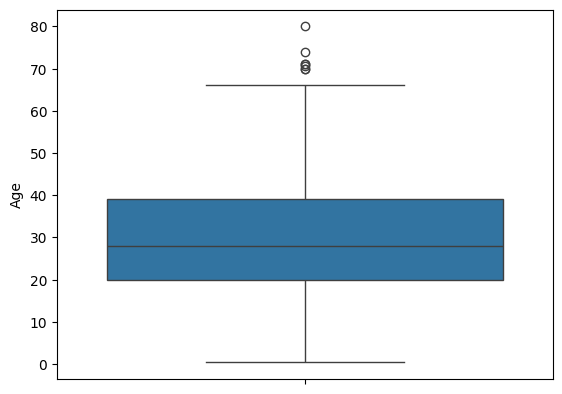

In [14]:
import seaborn as sns
sns.boxplot(y=train_data["Age"])

In [15]:
#We will replace nan values with median
train_data["Age"].median()

28.0

In [16]:
train_data["Age"].fillna(train_data["Age"].median(),inplace = True)

In [17]:
train_data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [18]:
train_data=pd.get_dummies(data=train_data,columns=["Embarked",'Sex'])

In [19]:
train_data

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,False,False,True,False,True
1,1,1,38.0,1,0,71.2833,True,False,False,True,False
2,1,3,26.0,0,0,7.9250,False,False,True,True,False
3,1,1,35.0,1,0,53.1000,False,False,True,True,False
4,0,3,35.0,0,0,8.0500,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,False,True,False,True,False
887,1,1,19.0,0,0,30.0000,False,False,True,True,False
888,0,3,28.0,1,2,23.4500,False,False,True,True,False
889,1,1,26.0,0,0,30.0000,True,False,False,False,True


In [20]:
train_data.astype(int)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22,1,0,7,0,0,1,0,1
1,1,1,38,1,0,71,1,0,0,1,0
2,1,3,26,0,0,7,0,0,1,1,0
3,1,1,35,1,0,53,0,0,1,1,0
4,0,3,35,0,0,8,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39,0,5,29,0,1,0,1,0
887,1,1,19,0,0,30,0,0,1,1,0
888,0,3,28,1,2,23,0,0,1,1,0
889,1,1,26,0,0,30,1,0,0,0,1


In [21]:
X=train_data.iloc[ : ,1:]  #independent variable set
Y=train_data.iloc[ : ,0]   #Dependent variable Survived

In [22]:
#Logistic regression and fit the model
classifier = LogisticRegression() # initialize the model i.e. called instance creation of class object.
# First create object 'classifier' for class LogisticRegression
classifier.fit(X,Y) # Then use this object to fit the model.
                    # This is the std methodology to build any algo. in sklearn

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = classifier.predict(X)

In [24]:
#Y hat value for x
y_pred

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,

In [25]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': classifier.predict(X)})

In [26]:
y_pred_df   #y , y hat in one dataframe stored

,actual,predicted_prob
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
885,0,0
887,1,1
888,0,0
889,1,1


In [28]:
# Confusion Matrix for the model accuracy
#Evaluation of logistic regresion is basedon confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[376  82]
 [ 93 229]]


In [29]:
((376+229)/(376+82+93+229))*100 #Accuracy

77.56410256410257

In [ ]:
#ROC curve

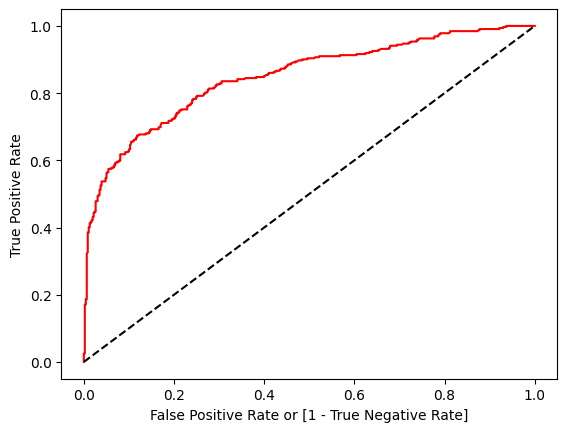

In [30]:
from sklearn.metrics import roc_curve #roc-receiver operating characteristic
from sklearn.metrics import roc_auc_score # auc-area under curve

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])
# we want to predict probability values for x data
# predict_proba returns probability estimates for all classes
# and the results are ordered by the label of classes i.e. 0 and 1.
# [:,1] will get the predicted probabilities of the positive label only
# here we will get false positive rate, true positive rate and threshold values
auc = roc_auc_score(Y, y_pred)# compute roc_auc_score based on y and y predicted

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')# x axis range is 0 to 1, y axis range is 0 to 1, k-- is a line type - dotted
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show() # red one is roc curve

In [31]:
auc

0.7660704114567793

In [ ]:
#Interview Questions:
#1. What is the difference between precision and recall?
#2. What is cross-validation, and why is it important in binary classification?



In [ ]:
#1)What is the difference between precision and recall?
#Answer :  Used to evaluate the performance of a classification model
#          Precision : Measures the proportion of TRUE POSITIVE(correctly predicted instances)
#                      among all positive predictions made by the model.
#          Precision=True Positive/(True Positive + False Positive)

#          Recall :  Measures the proportion of True Positive among all actual positive instances in the dataset
#          Recall = True Positive/(True Positive + False Negative)

#Differences:
#Precision focuses on the accuracy of positive predictions
#Recall focuses on the completeness of positive predictions.

#Precision is sensitive to False positive.
#Recall is sensitive to False Negative.

#Precision is used when the cost of False Positive is high.
#Recall is used when the cost of False Negative is high.